# Jupyter Data Science Workflow

Tutorial


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.style.use('seaborn')
from urllib.request import urlretrieve
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fa4ed067be0>)

In [3]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()
data.columns = ['East', 'West']

In [5]:
%matplotlib inline

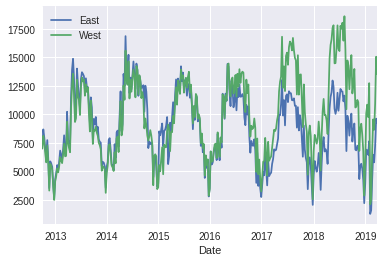

In [6]:
data.resample('W').sum().plot()

(0, 1100992.6)

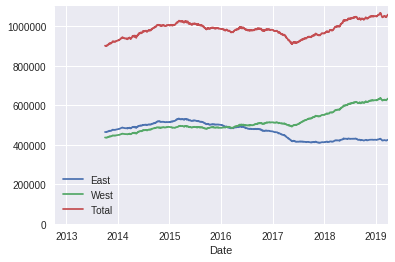

In [7]:
data['Total'] = data['East'] + data['West']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

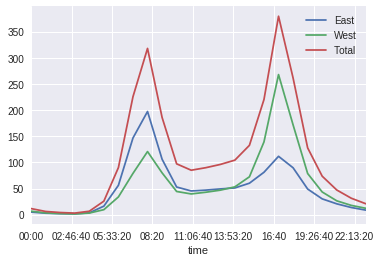

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [10]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


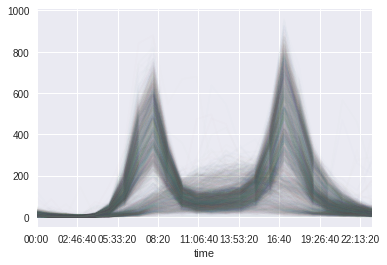

In [13]:
pivoted.plot(legend=False, alpha=0.01)